In [20]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('../남해 부이자료.csv',encoding='cp949')
df1 = pd.read_csv('temp202301_202304.csv', encoding='utf-8')
df1 = df1.set_index('일시')

In [22]:
df = df.drop(['지점'], axis=1)
df.head()

일시  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
0  2013-01-01         6.8     1020.6        61.0        6.2       13.9   
1  2013-01-02         9.6     1026.8        58.0        4.2       13.8   
2  2013-01-03         NaN     1034.6        59.0       -1.6       13.1   
3  2013-01-04         5.2     1029.4        47.0       -0.4       11.8   
4  2013-01-05         7.3     1024.8        54.0        1.5       11.3   

   평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)  
0          2.1          1.4          5.5  
1          2.3          1.5          4.5  
2          NaN          NaN          NaN  
3          1.5          0.9          4.3  
4          1.4          1.0          3.9

In [23]:
df = df.interpolate(method='values')
df1.isnull().sum()

평균 풍속(m/s)     0
평균기압(hPa)      0
평균 상대습도(%)     0
평균 기온(°C)      0
평균 수온(°C)      0
평균 최대 파고(m)    0
평균 유의 파고(m)    0
평균 파주기(sec)    0
dtype: int64

In [24]:
# df = df.dropna(axis=0)
# df.isnull().sum()

In [25]:
df['일시'] = pd.to_datetime(df['일시'])
df = df.groupby(df['일시'].dt.strftime('%Y-%m-%d')).mean()
df1.sort_index()
df = pd.concat([df,df1], axis=0, join='outer')
df = df.sort_index()
df

평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
2013-01-01    7.766667  1020.866667   56.333333   7.266667  14.533333   
2013-01-02    9.266667  1027.300000   57.666667   5.166667  14.833333   
2013-01-03    9.800000  1033.866667   59.666667   0.033333  14.400000   
2013-01-04    7.133333  1029.200000   54.333333   1.366667  14.133333   
2013-01-05    7.366667  1024.600000   53.666667   3.300000  14.100000   
...                ...          ...         ...        ...        ...   
2023-03-31    5.057143  1018.000000   74.142857  15.028571  14.771429   
2023-04-01    6.037500  1015.687500   83.125000  15.662500  15.287500   
2023-04-02    8.800000  1017.575000   74.500000  15.262500  15.050000   
2023-04-03   10.587500  1021.025000   77.750000  14.875000  15.175000   
2023-04-04    8.925000  1018.275000   85.000000  16.300000  15.225000   

            평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)  
일시                                                 
2013-01-01     2.266667     1.500000     6.266667  
2013-01-02     2.366667     1.533333     5.400000  
2013-01-03     2.400000     1.533333     5.366667  
2013-01-04     1.866667     1.166667     6.033333  
2013-01-05     1.466667     0.933333     5.500000  
...                 ...          ...          ...  
2023-03-31     1.557143     0.928571     5.642857  
2023-04-01     1.812500     1.037500     5.450000  
2023-04-02     3.037500     1.850000     6.025000  
2023-04-03     3.737500     2.375000     6.612500  
2023-04-04     2.887500     1.787500     5.912500  

[3746 rows x 8 columns]

In [26]:
df.to_csv('남해 기후데이터.csv',encoding='utf-8-sig')

In [27]:
df = df.reset_index(drop=False)
df_prescale = df.drop(['일시'],axis=1)
scaler = StandardScaler()
scaler.fit(df_prescale)

wdf_scaled = scaler.transform(df_prescale) 

df_scaled = pd.DataFrame(wdf_scaled, columns=df_prescale.columns) 
df_scaled['일시']= df['일시'].values


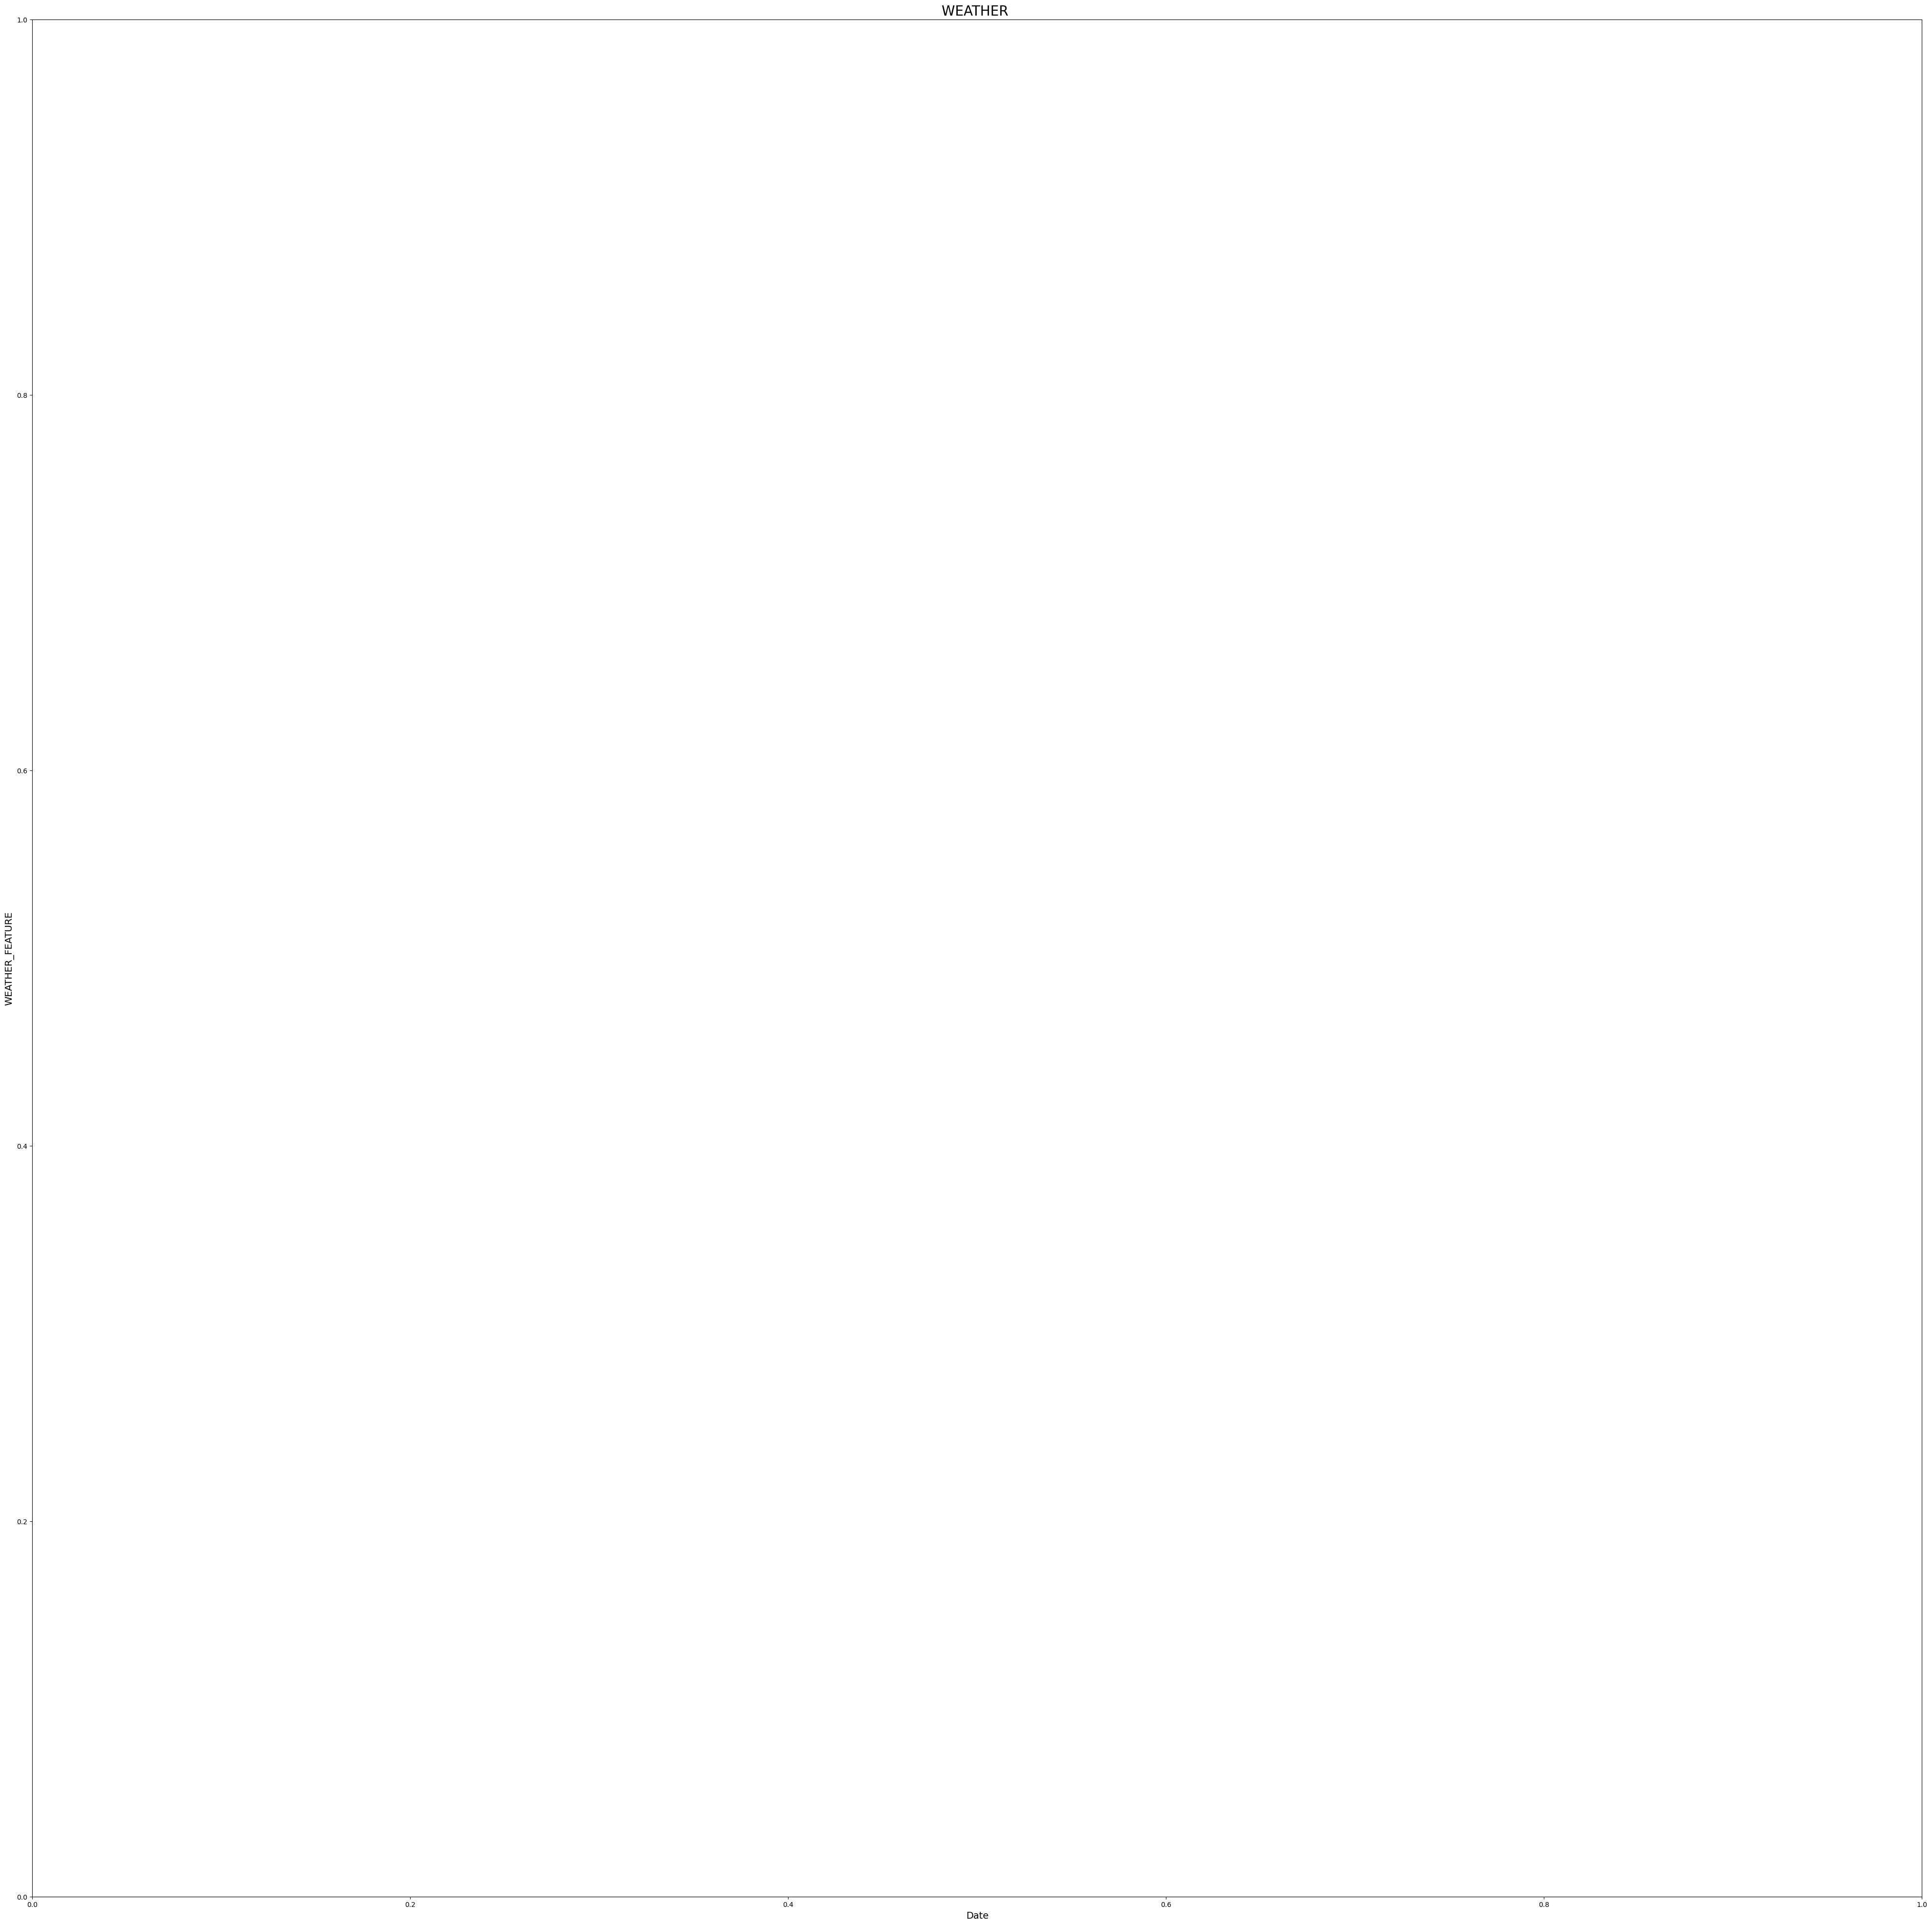

In [28]:
plt.figure(figsize=(50,50))
# plt.plot(df['일시'], df['평균 풍속(m/s)'], marker='s', color='r')
# plt.plot(df['일시'], df['평균기압(hPa)'], marker='o', color='g')
# plt.plot(df['일시'], df['평균 상대습도(%)'], marker='*', color='b')
# plt.plot(df['일시'], df['평균 기온(°C)'], marker='+', color='y')
# plt.plot(df['일시'], df['평균 수온(°C)'], marker='.', color='m')
# plt.plot(df['일시'], df['평균 최대 파고(m)'], marker='v', color='c')
# plt.plot(df['일시'], df['평균 유의 파고(m)'], marker='^', color='k')
# plt.plot(df['일시'], df['평균 파주기(sec)'], marker='<', color='gray')

plt.title('WEATHER ', fontsize=20) 
plt.ylabel('WEATHER_FEATURE', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.show()
